In [63]:
'''
Visualize the data generated from src/cut_and_project/three_dim_commuting.py
'''
import os
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from aperiodic_codes import cut_and_project
from aperiodic_codes.cut_and_project.config import tests
data_folder = '../data/apc/6d_to_3d/'
n = 3

%matplotlib widget

In [64]:
# check commutation in 5D
#hx = np.load(os.path.join(data_folder, f'hx_n={n}.npy'))
#hz = np.load(os.path.join(data_folder, f'hz_n={n}.npy'))
#assert hx.shape[1] == hz.shape[1]
#assert np.sum(hx @ hz.T % 2) < 1e-5
# assert np.allclose(hx @ hz.T % 2, np.zeros_like(hx @ hz.T))
# assert np.allclose(hz @ hx.T % 2, np.zeros_like(hz @ hx.T))

# for i in range(hx.shape[0]):
#     assert np.sum(hx[i]) == 5, f"{np.sum(hx[i])}"

# for i in range(hz.shape[0]):
#     assert np.sum(hz[i]) == 5, f"{np.sum(hz[i])}"

In [65]:
# visualize points in 3D
pid = '20240903_n=4_2'
data = np.load(os.path.join(data_folder, f'{pid}.npz'))
proj_pts = data['proj_pts'];
n_points = proj_pts.shape[0];
print(f'Number of points: {n_points}');

# cut_bulk = data['cut_bulk'];

# fig = plt.figure();
# ax = fig.add_subplot(111, projection='3d')
# ax.set_box_aspect([1,1,1])
# ax.scatter(proj_pts[:,0], proj_pts[:,1], proj_pts[:,2],color='k',s=5);
# plt.show();

Number of points: 1551


In [66]:
# check anti-commutation between X and Z checks
new_hx_cc = data['hx_cc'];
new_hx_vv = data['hx_vv'];
new_hz_cc = data['hz_cc'];
new_hz_vv = data['hz_vv'];

In [67]:
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_box_aspect([1,1,1])
# for i in range(new_hx_cc.shape[0]):
#     for j in range(new_hx_cc.shape[1]):
#         if new_hx_cc[i,j] != 0:
#             ax.plot([proj_pts[i,0],proj_pts[j,0]],[proj_pts[i,1],proj_pts[j,1]],zs=[proj_pts[i,2],proj_pts[j,2]],color='C0',lw=1,alpha=0.5);
# for i in range(new_hz_cc.shape[0]):
#     for j in range(new_hz_cc.shape[1]):
#         if new_hz_cc[i,j] != 0:
#             ax.plot([proj_pts[i,0],proj_pts[j,0]],[proj_pts[i,1],proj_pts[j,1]],zs=[proj_pts[i,2],proj_pts[j,2]],color='C2',lw=1,alpha=0.5);
# ax.scatter(proj_pts[:,0], proj_pts[:,1],proj_pts[:,2],color='k',s=8);

# #lmask = [2,197%proj_pts.shape[1]];
# #ax.scatter(proj_pts[0,lmask],proj_pts[1,lmask],color='r',marker='*',s=100);
# plt.show()

In [68]:
new_hx = np.hstack([new_hx_cc, new_hx_vv])
new_hz = np.hstack([new_hz_cc, new_hz_vv])
# # anti_comm_mat_x = (new_hx @ new_hz.T) % 2
# anti_comm_mat_x = (new_hx @ new_hz.T)[np.ix_(cut_bulk,cut_bulk)] % 2
# np.sum(anti_comm_mat_x)

In [69]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_box_aspect([1,1,1])
# for i in range(anti_comm_mat_x.shape[0]):
#     for j in range(anti_comm_mat_x.shape[1]):
#         if anti_comm_mat_x[i,j] != 0:
#             if i == j:
#                 i_proj = cut_bulk[i]
#                 ax.scatter([proj_pts[i_proj,0]],[proj_pts[i_proj,1]],[proj_pts[i_proj,2]],color='r',m='*');
#             else:
#                 i_proj = cut_bulk[i]
#                 j_proj = cut_bulk[j]
#                 ax.plot([proj_pts[i_proj,0],proj_pts[j_proj,0]],[proj_pts[i_proj,1],proj_pts[j_proj,1]],zs=[proj_pts[i_proj,2],proj_pts[j_proj,2]],ls='-',lw=1,color='r');
# ax.scatter(proj_pts[:,0], proj_pts[:,1],proj_pts[:,2],color='k')
# plt.show()

In [70]:
# anti_comm_x_inds = np.where(anti_comm_mat_x != 0)
# full_to_cut_ind_map = np.load(os.path.join(data_folder, f'{pid}_map.pkl'), allow_pickle=True)
# cut_to_full_ind_map = {v:k for k,v in full_to_cut_ind_map.items()}
# cut_to_full_ind_map[cut_bulk[anti_comm_x_inds[0][1]]]

In [71]:
from ldpc import mod2
def compute_lz(hx,hz):
    #lz logical operators
    #lz\in ker{hx} AND \notin Im(Hz.T)

    ker_hx=mod2.nullspace(hx) #compute the kernel basis of hx
    im_hzT=mod2.row_basis(hz) #compute the image basis of hz.T

    #in the below we row reduce to find vectors in kx that are not in the image of hz.T.
    log_stack=np.vstack([im_hzT,ker_hx])
    pivots=mod2.row_echelon(log_stack.T)[3]
    log_op_indices=[i for i in range(im_hzT.shape[0],log_stack.shape[0]) if i in pivots]
    log_ops=log_stack[log_op_indices]

    return log_ops

In [72]:
lz = compute_lz(new_hx,new_hz)
lx = compute_lz(new_hz,new_hx)
assert len(lx) == len(lz)
k = len(lx)
print(f'Number of logical operators: {k}')

Number of logical operators: 0


In [73]:
for i in range(k):
    print(f'{i}-th L_X: {np.sum(lx[i])}')
    print(f'{i}-th L_Z: {np.sum(lz[i])}')

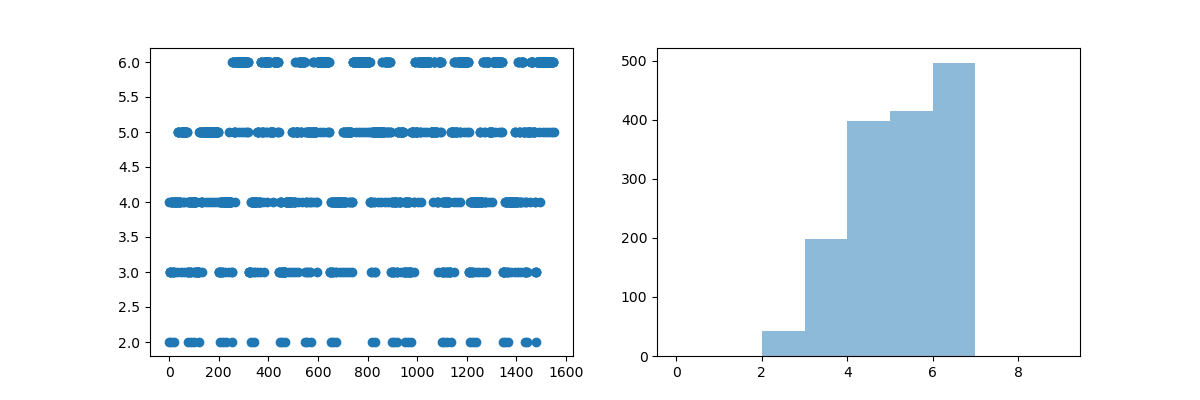

In [74]:
hx_to_vv_weights = np.sum(new_hx, axis=1)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(hx_to_vv_weights, 'o')
ax[1].hist(hx_to_vv_weights, bins=range(10), alpha=0.5, label='hx to vv weights');
plt.show()

/tmp/ipykernel_1062089/2797099245.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,2,figsize=(12,4))


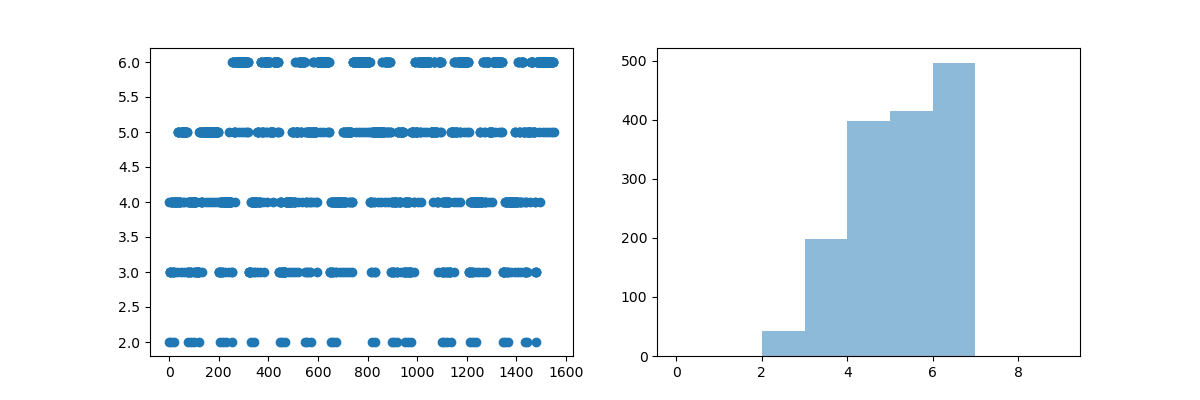

In [75]:
hx_to_cc_weights = np.sum(new_hx, axis=1)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(hx_to_cc_weights, 'o')
ax[1].hist(hx_to_cc_weights, bins=range(10), alpha=0.5, label='hx to cc weights');
plt.show()

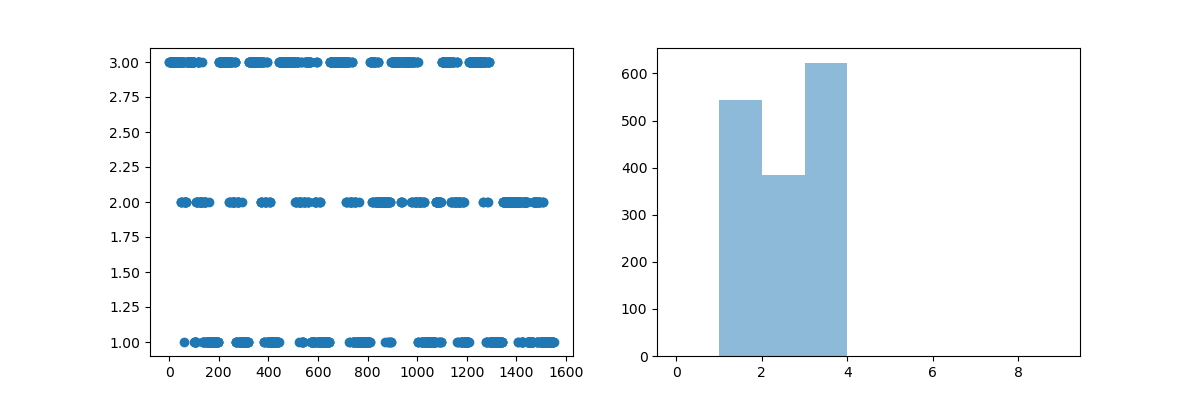

In [76]:
vv_to_hx_weights = np.sum(new_hx_vv, axis=0)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(vv_to_hx_weights, 'o')
ax[1].hist(vv_to_hx_weights, bins=range(10), alpha=0.5, label='vv to hx weights');
plt.show()

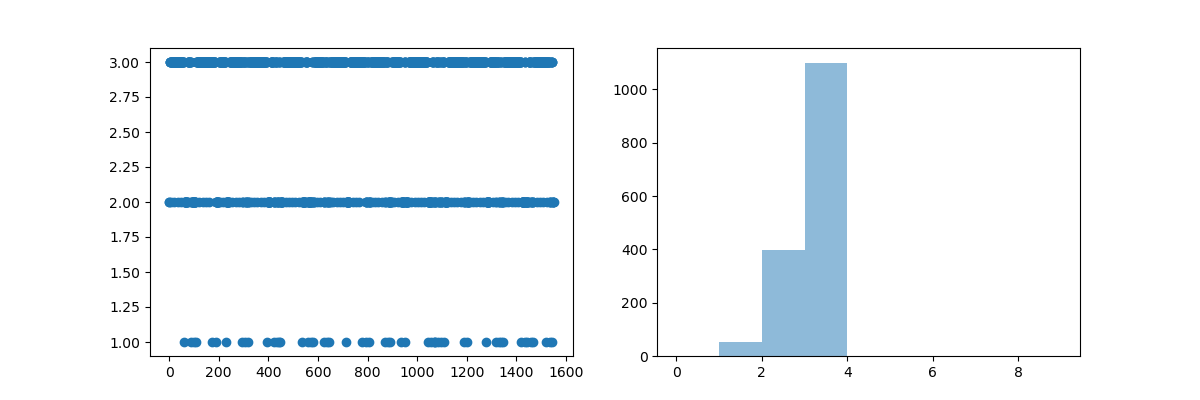

In [81]:
cc_to_hx_weights = np.sum(new_hx_cc, axis=0)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(cc_to_hx_weights, 'o')
ax[1].hist(cc_to_hx_weights, bins=range(10), alpha=0.5, label='cc to hx weights');
plt.show()

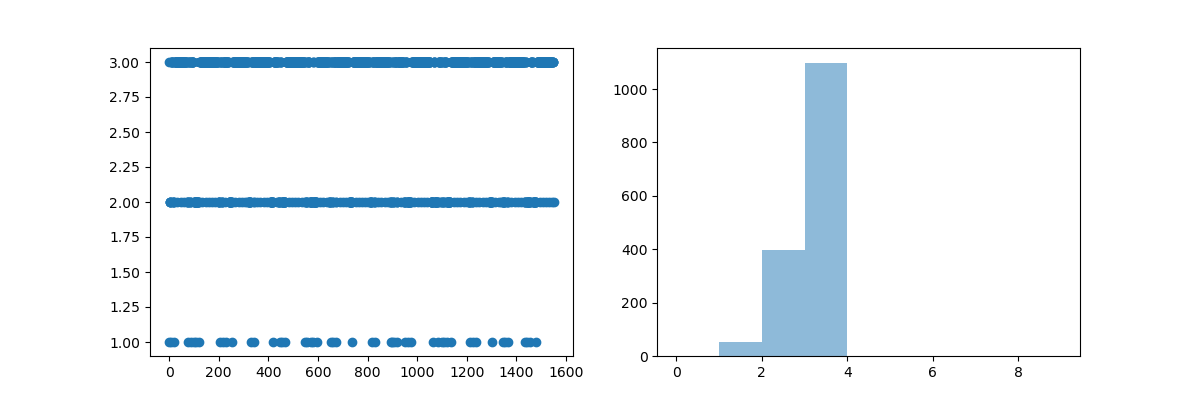

In [84]:
vv_to_hz_weights = np.sum(new_hz_vv, axis=0)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(vv_to_hz_weights, 'o')
ax[1].hist(vv_to_hz_weights, bins=range(10), alpha=0.5, label='cc to hz weights');
plt.show()

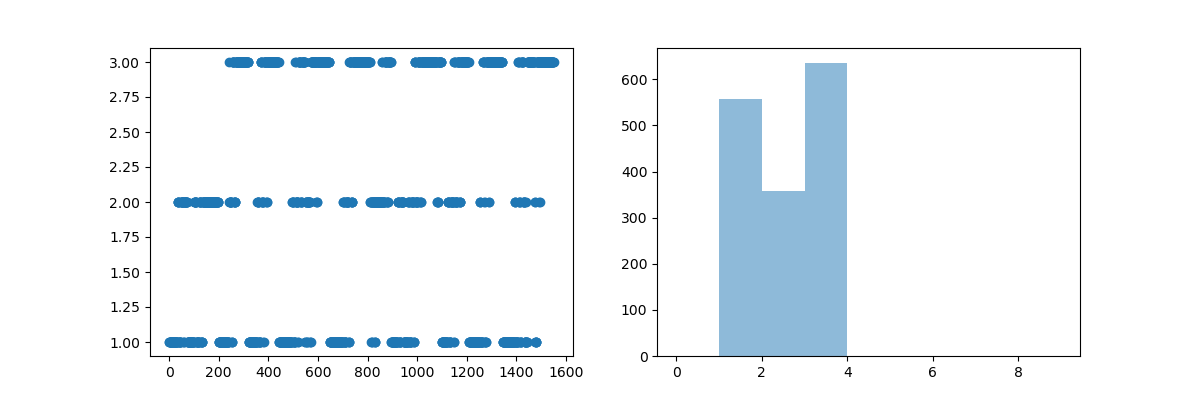

In [85]:
cc_to_hz_weights = np.sum(new_hz_cc, axis=0)
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(cc_to_hz_weights, 'o')
ax[1].hist(cc_to_hz_weights, bins=range(10), alpha=0.5, label='cc to hz weights');
plt.show()

In [77]:
for i in range(new_hx_cc.shape[1]):
    if new_hx_cc[0,i] != 0 and new_hz_cc[1,i] != 0:
        print(f'{i}-th CC qubit is in both X and Z stabilizers')

for i in range(new_hx_vv.shape[1]):
    if new_hx_vv[0,i] != 0 and new_hz_vv[1,i] != 0:
        print(f'{i}-th VV qubit is in both X and Z stabilizers')

In [91]:
# randomly deleting some X stabilizers
k_delx = []
dx_delx = []
dz_delx = []
assert new_hx_cc.shape[1] == new_hx_cc.shape[0]
start = timer()
for i in range(new_hx.shape[0]):
    delx_hx = np.delete(new_hx, i, axis=0)
    lz = compute_lz(delx_hx, new_hz)
    lx = compute_lz(new_hz, delx_hx)
    assert len(lx) == len(lz)
    k = len(lx)
    k_delx.append(k)
    dz_delx.append(np.sum(lz[0]))
    dx_delx.append(np.sum(lx[0]))
    end = timer()
    if (end - start) > 60:
        print(f'Finished {i} deletions in {end-start} seconds')
        break


KeyboardInterrupt: 

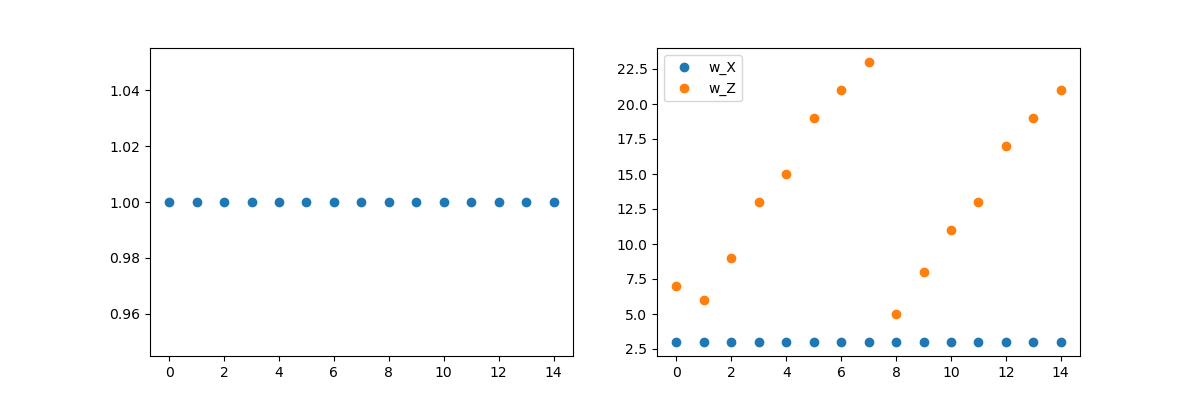

In [92]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(k_delx, 'o')
ax[1].plot(dx_delx, 'o', label='w_X')
ax[1].plot(dz_delx, 'o', label='w_Z')
plt.legend()
plt.show()

In [96]:
ind = 0
del_hx = np.delete(new_hx, ind, axis=0)
lz = compute_lz(del_hx, new_hz)
lx = compute_lz(new_hz, del_hx)
np.sum(lx[0]), np.sum(lz[0])


(2, 7)

In [97]:
# randomly deleting some X stabilizers
k_delz = []
dx_delz = []
dz_delz = []
assert new_hx_cc.shape[1] == new_hx_cc.shape[0]
for i in range(new_hz.shape[0]):
    delz_hz = np.delete(new_hz, i, axis=0)
    lz = compute_lz(new_hx, delz_hz)
    lx = compute_lz(delz_hz, new_hx)
    assert len(lx) == len(lz)
    k = len(lx)
    k_delz.append(k)
    dz_delz.append(np.sum(lz[0]))
    dx_delz.append(np.sum(lx[0]))

KeyboardInterrupt: 

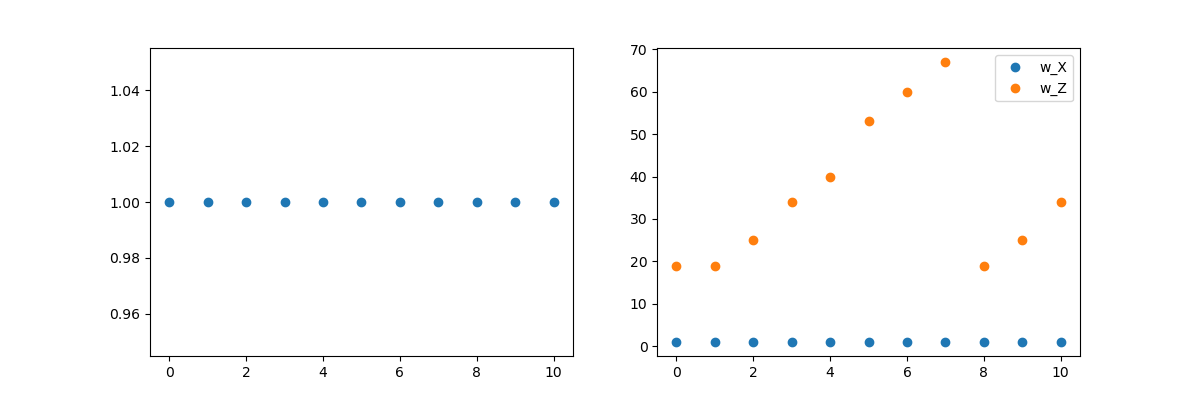

In [98]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(k_delz, 'o')
ax[1].plot(dx_delz, 'o', label='w_X')
ax[1].plot(dz_delz, 'o', label='w_Z')
plt.legend()
plt.show()